In [68]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [69]:
train = pd.read_csv('../input/Train.csv')
test = pd.read_csv('../input/Test.csv')

In [70]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [71]:
test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.021804,-0.012806,-0.010988,-0.034864,0.031016,2.988897
std,0.979163,1.021580,1.041857,1.034507,0.937469,114.139329
min,-2.564288,-2.992849,-2.767818,-3.041550,-2.493446,-320.048473
25%,-0.784581,-0.640843,-0.780267,-0.730596,-0.589199,-65.763521
50%,-0.004759,-0.077186,-0.109300,-0.040752,0.047327,0.699553
75%,0.681777,0.738286,0.754063,0.656363,0.586405,83.257690
max,3.244870,2.591723,2.909357,2.662180,2.870382,335.497450


In [72]:
train.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [73]:
test.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

### So we got cleaned data

All are contineous

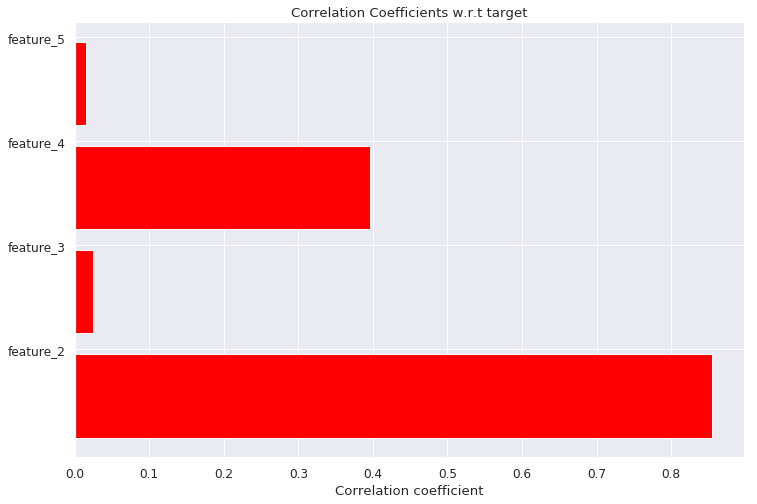

In [74]:
#plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.target.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t target");

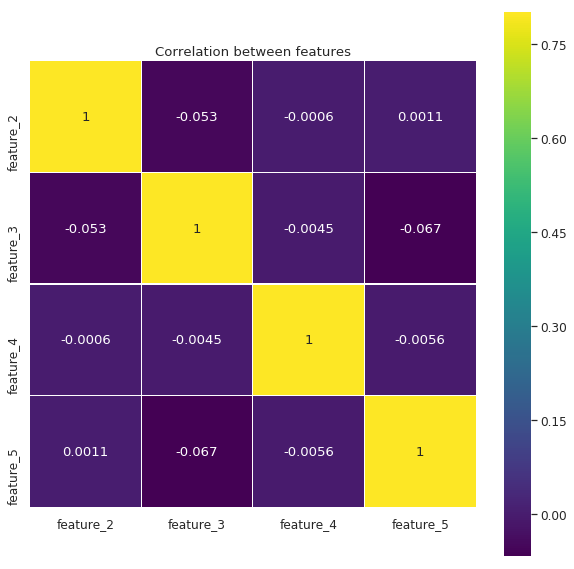

In [75]:
#Heatmap
corrMatrix=train[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

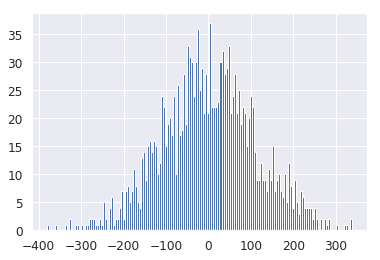

In [76]:
plt.hist((train.target),bins=152)
plt.show()

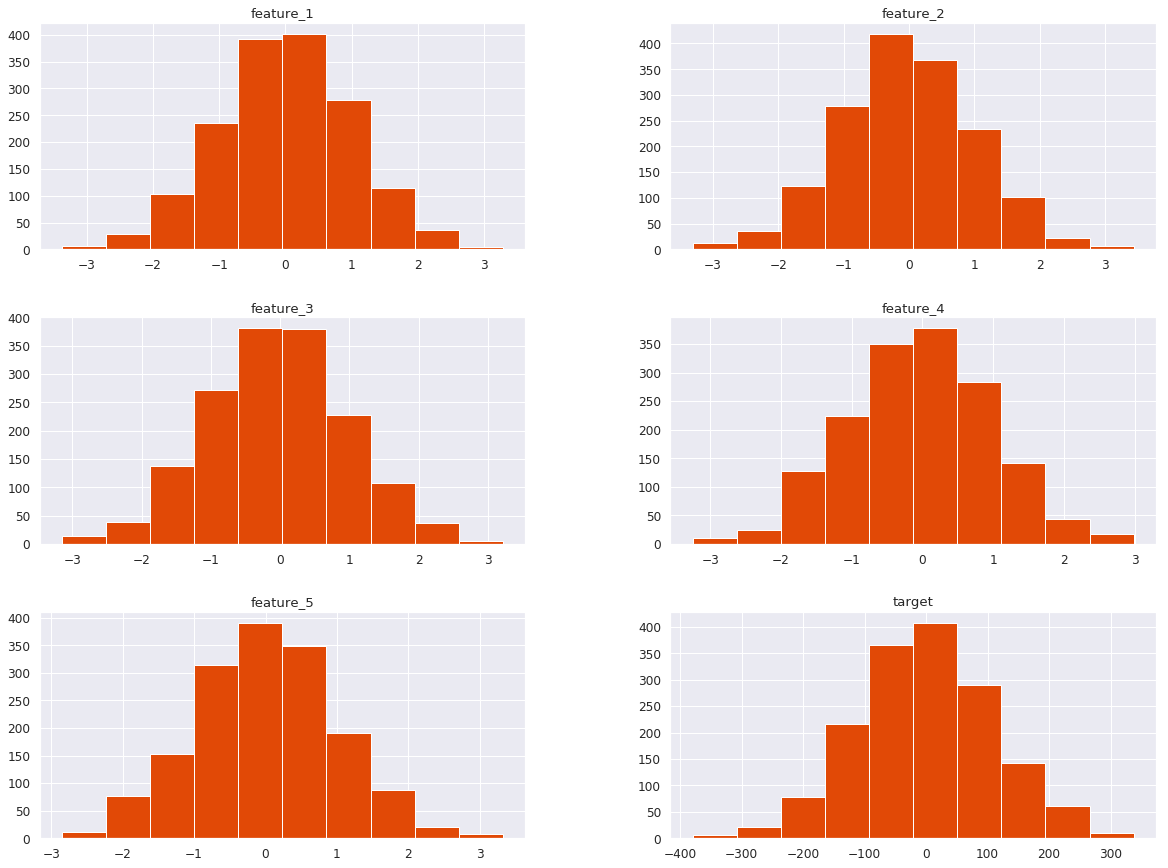

In [77]:
# Let's see how the numeric data is distributed.

train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

# Linear Regression 

By merging train.csv and test.csv data and then splitting in 80:20 ratio

then creating model

and calculating score

In [78]:
combined = train.append(test)
combined.reset_index(inplace=True)


In [79]:
combined.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808,0.852848
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356,111.405622
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389,-70.173508
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115,-0.466188
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205,73.638671
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [80]:
y = combined['target']
x = combined.drop('target', axis=1)

In [81]:
y.describe()

count    2000.000000
mean        0.852848
std       111.405622
min      -379.829794
25%       -70.173508
50%        -0.466188
75%        73.638671
max       337.643014
Name: target, dtype: float64

In [82]:
x.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770


### Splitting into 80:20

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


In [85]:
# Implimenting Linear Regression from inbuilt function of sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(X_train,y_train)
predict = model.predict(X_test)

In [86]:
#Predicting Score
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.9641288195004398


In [87]:
print("Training Score %.4f"%reg.score(X_train,y_train))
print("Testing Score %.4f"%reg.score(X_test,y_test))

Training Score 0.9674
Testing Score 0.9641


# Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='r2')

In [90]:
print(scores)

[0.96128376 0.97250373 0.96621018 0.96489258 0.97261056 0.96857034
 0.95877738 0.96800258 0.96598501 0.96641101]


In [91]:
print(scores.mean())

0.9665247134325773


In [92]:
print(scores.std())

0.004119594419590728


### Calculating loss


In [93]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [94]:
print(scores)

[-417.84913653 -388.84408621 -395.42654872 -433.22488279 -379.61871768
 -396.84102332 -434.50770493 -378.55829126 -431.17062195 -496.01929631]


In [95]:
#Average loss
print(scores.mean())

-415.20603097069414


In [96]:
print(scores.std())

33.945307354448886


## Linear Regression fit

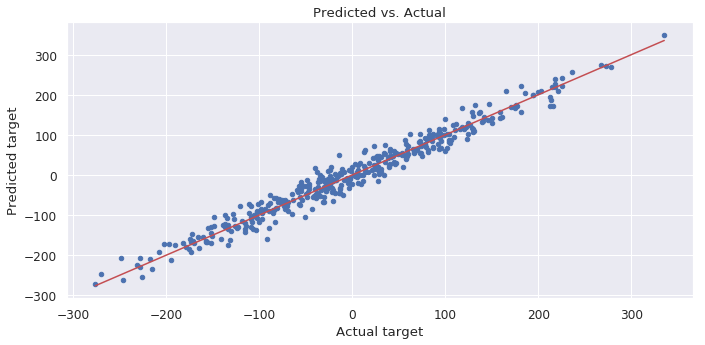

In [97]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r')
plt.tight_layout()

### Predicted Values

In [98]:
y_pred.shape

(400,)

In [99]:
print("predicted values for 400 test data are", y_pred)

predicted values for 400 test data are [ 8.35128453e+00 -1.10992460e+02  5.33247800e+01  1.44391391e+02
  1.39076637e+02  2.07357888e+00  1.59015219e+01 -3.49394455e+00
  3.49493108e+02 -7.32818834e+01  1.68707466e+02 -2.18825196e+01
  1.16782433e+01 -3.16897725e+01  9.14043688e+01  5.27612949e+01
 -1.60244301e+02 -4.44805824e+01 -7.02421135e+01  1.27411902e+01
 -9.59116548e+01 -4.51125824e+01  1.42793315e+01  1.73848516e+02
  1.19974085e+02 -1.24850564e+02  6.64837849e+01  4.83871013e+01
  4.69544832e+01  8.45432967e+01  1.90424322e+01  1.72321366e+02
  1.56766932e+02  1.15573880e+02 -1.91526648e+02  2.09449114e+02
  5.79885012e+01 -1.59057406e+01 -8.85352044e+01 -2.85100087e+01
 -9.78133023e+01 -4.37043906e+01  8.83050285e+01  1.25207045e+02
  1.02630248e+02 -4.25848193e+01  7.21995050e+01 -2.18739670e+01
 -9.46084623e+01 -2.46869875e+02 -7.74728074e+01 -1.55374686e+02
 -6.84903630e+01 -7.00464802e+01  4.52082062e+01  1.17244208e+01
 -3.15951555e+01 -1.24625411e+02 -1.06138934e+02  1

In [119]:
df = pd.DataFrame(y_pred)


In [120]:
df.index.names = ["index"]

In [124]:
df.columns = ["Predicted values"]

In [125]:
df.head()

,Predicted values
index,
0,8.351285
1,-110.992460
2,53.324780
3,144.391391
4,139.076637


In [127]:
df.to_csv('predictedres.csv')